In [41]:
import numpy as np
import os, sys, time, subprocess, h5py, argparse, logging, pickle, random
from os.path import join as oj
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
results = {}
for dirname in os.listdir('.'):
    if ('net' in dirname or 'scat' in dirname) and not '.png' in dirname:
        print(dirname)

        try:
            x = np.loadtxt(oj(dirname, 'log.txt'), skiprows=1)
            trn = x[-1, -2]
            val = x[-1, -1]
            print(val, trn)
            results[dirname] = (trn, val)
        except:
            pass
results['alexnet'] = (95, 42)

alexnet
alexscat
43.35 96.602
scatfirst
42.16 92.902
scatfirst2
50.37 72.038
scatfirst3
48.99 58.558
scatfirst4
39.28 42.038


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: loadtxt: Empty input file: "alexnet/log.txt"
  import sys


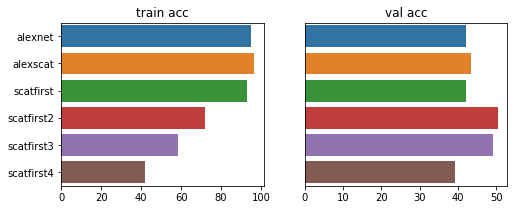

In [61]:
keys = sorted(list(results.keys()))
vals = np.array([results[key] for key in keys])
plt.figure(figsize=(8, 3))
plt.subplot(121)
sns.barplot(vals[:, 0], keys, orient='h')
plt.title('train acc')
plt.subplot(122)
sns.barplot(vals[:, 1], keys, orient='h')
plt.gca().get_yaxis().set_visible(False)
plt.title('val acc')
plt.savefig('cifar100_accs.pdf')
plt.show()

In [38]:
print(keys)
print(vals[:, 0])

['alexscat' 'scatfirst' 'scatfirst2' 'scatfirst3' 'scatfirst4']
[ 43.35  42.16  50.37  48.99  39.28]
